In [5]:
import pandas as pd
import os 
import re
import matplotlib.pyplot as plt

## Lendo arquivos de resultados

Coluna "variavel":
- categoria
- filme
- media

In [6]:
df_dict = {}
heuristicas = "../heuristicas"
for heuristica in os.listdir(heuristicas):
    f = os.path.join(heuristicas, heuristica)
    df_dict[heuristica] = pd.read_csv(f+"/results.csv")

In [7]:
def extract_value(file_name):
    return int((re.findall('\d+', file_name ))[0])

In [8]:
for df in df_dict.values():
    df["variavel_numero"] = df.apply(lambda x: extract_value(x["nome_arquivo"]), axis = 1)

In [9]:
df_dict["gulosa"].head()

,variavel,numero_filmes,alocacao_tempo,tempo_execucao,nome_arquivo,variavel_numero
0,categoria,7,12,0.000056,in22.txt,22
1,categoria,10,14,0.000045,in18.txt,18
2,categoria,3,6,0.000087,in6.txt,6
3,categoria,8,15,0.000048,in16.txt,16
4,categoria,5,9,0.000040,in8.txt,8


In [10]:
df_dict["gulosa_aleatoria"].head()

,variavel,numero_filmes,alocacao_tempo,tempo_execucao,nome_arquivo,variavel_numero
0,categoria,5,7,0.000178,in22.txt,22
1,categoria,7,10,0.000084,in18.txt,18
2,categoria,3,4,0.000069,in6.txt,6
3,categoria,6,12,0.000081,in16.txt,16
4,categoria,4,9,0.000075,in8.txt,8


## Análise de variáveis

In [11]:
def df_filter(df, variable):
    return df[df["variavel"] == variable]

### Quantidade de filmes alocados

O número de categoria se mantém fixo (5 categorias) e o tempo médio de cada filme também (2 horas)

In [12]:
df_movie_variable_dict = {}
for k, v in df_dict.items():
    df_movie_variable_dict[k] = df_filter(v, "filme")
    df_movie_variable_dict[k] = df_movie_variable_dict[k].drop(["nome_arquivo"], axis = 1)


In [16]:
df_movie_variable_dict["gulosa"].head()

,variavel,numero_filmes,alocacao_tempo,tempo_execucao,variavel_numero
25,filme,17,17,0.001676,3660
26,filme,19,19,0.002762,6820
27,filme,13,13,0.002900,6990
28,filme,15,15,0.001148,2790
29,filme,18,18,0.000760,1680


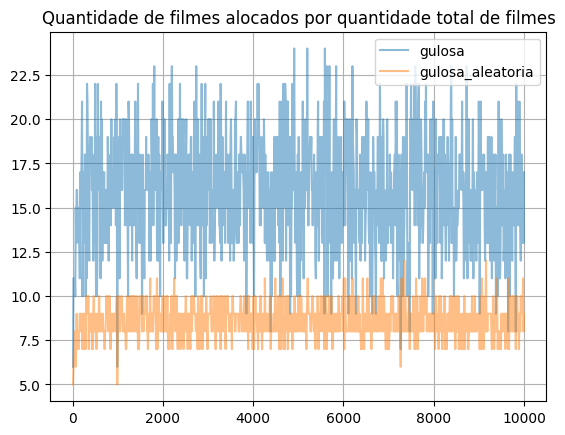

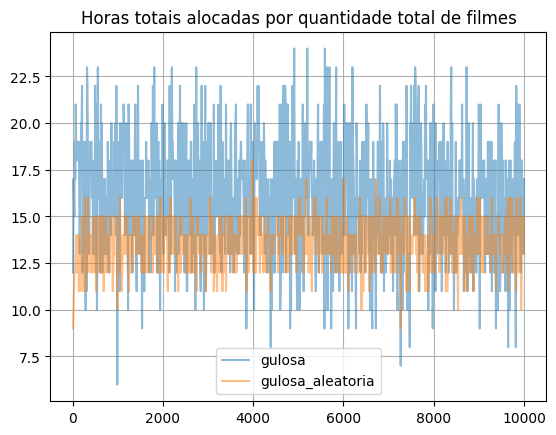

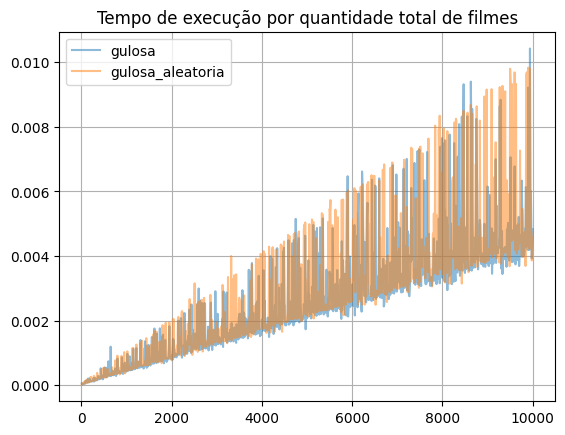

In [25]:
columns = ["numero_filmes", "alocacao_tempo", "tempo_execucao"]
title = {"numero_filmes": "Quantidade de filmes alocados",
         "alocacao_tempo": "Horas totais alocadas",
         "tempo_execucao": "Tempo de execução"}

for column in columns:
    for k, v in df_movie_variable_dict.items():
        xs, ys = zip(*sorted(zip(v["variavel_numero"], v[column])))
        plt.title("{} por quantidade total de filmes".format(title[column]))
        plt.plot(xs, ys, label = k, alpha = 0.5)
    plt.legend()
    plt.grid(True)
    plt.show()